In [406]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score

In [407]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

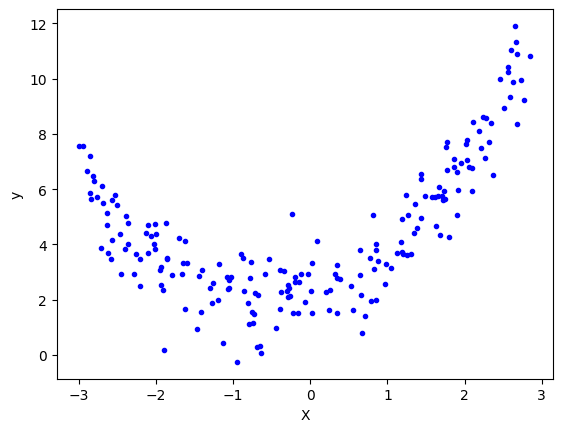

In [408]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [540]:
import numpy as np

class MultipleLinearRegression:
    
    def __init__(self):
        self.coef_: np.array = None
        self.intercept_: np.float64 = None

    def fit(self, X_train: np.array, y_train: np.array):
        X_train = np.insert(X_train, obj=0, values=1, axis=1)

        BETA = np.linalg.inv( np.dot( X_train.T, X_train ) ) . dot(X_train.T) . dot(y_train)
        self.intercept_ = BETA[0]
        self.coef_      = BETA[1:]

    def predict(self, X_test: np.array) -> np.array:

        return np.dot(X_test, self.coef_) + self.intercept_

    def score(self, X_test: np.array, y_test: np.array, method: str = None) -> np.float64:

        y_pred = self.predict(X_test)
        ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
        ss_residual = np.sum((y_test - y_pred) ** 2)

        print(y_test.shape, y_pred.shape)

        R2 = 1 - (ss_residual / ss_total)
        n, k = X_test.shape

        if method == "adj":
            return 1 - ( (1 - R2) * (n - 1) / (n - 1 - k) )

        return 1 - (ss_residual / ss_total)

In [410]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=2
)

In [411]:
lr = MultipleLinearRegression()

In [412]:
lr.fit(X_train, y_train)

In [413]:
lr.score(X_test, y_test)

np.float64(0.35795747160463687)

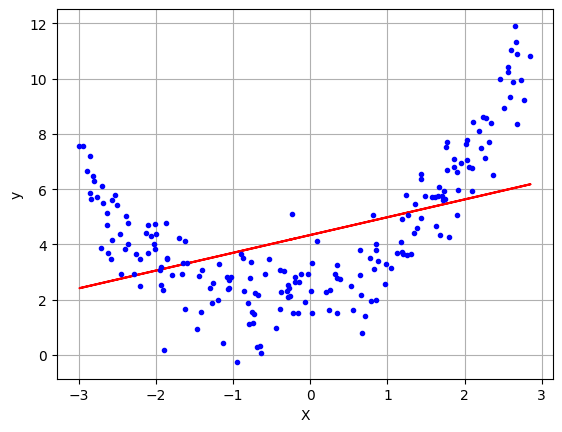

In [414]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Polynomial features needed

In [415]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_Poly = poly.fit_transform(X_train)
X_test_Poly  = poly.transform(X_test)

In [497]:
print(X_train.shape)
print(X_train_Poly.shape)
# 3 columns: x^0, x^1, x^2

(80, 2)
(160, 21)


In [417]:
plr = MultipleLinearRegression()

In [418]:
plr.fit(X_train_Poly, y_train)

In [419]:
plr.score(X_test_Poly, y_test)

np.float64(0.8650096159045556)

In [420]:
plr.coef_, plr.intercept_
print(plr.coef_.shape)

(2, 1)


In [421]:
def polynomial(x):
    coefficients = plr.coef_
    intercept = plr.intercept_
    
    y_pred = np.zeros_like(x)
    for i in range(len(coefficients)):
        y_pred += coefficients[i] * x**(i+1)  # i+1 because degree starts from 1 in PolynomialFeatures
    return y_pred + intercept

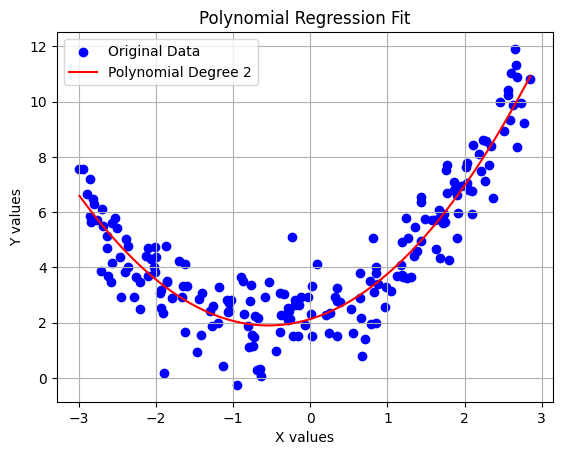

In [422]:
# Generate a range of X values for plotting
X_range = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_poly = plr.predict(X_range_poly)

# Plot original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the polynomial curve
plt.plot(X_range, y_poly, color='red', label=f'Polynomial Degree {poly.degree}')

# Add labels, title, and grid
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.title('Polynomial Regression Fit')
plt.grid(True)

# Overfitting

In [423]:
poly = PolynomialFeatures(degree=21, include_bias=False)

X_train_Poly = poly.fit_transform(X_train)
X_test_Poly  = poly.transform(X_test)

In [424]:
overfit = MultipleLinearRegression()

In [425]:
overfit.fit(X_train_Poly, y_train)

In [426]:
overfit.score(X_test_Poly, y_test)

np.float64(0.7254444143854227)

In [427]:
# overfit.coef_

In [428]:
def polynomial(x):
    coefficients = plr.coef_
    intercept = plr.intercept_
    
    y_pred = np.zeros_like(x)
    for i in range(len(coefficients)):
        y_pred += coefficients[i] * x**(i+1)  # i+1 because degree starts from 1 in PolynomialFeatures
    return y_pred + intercept

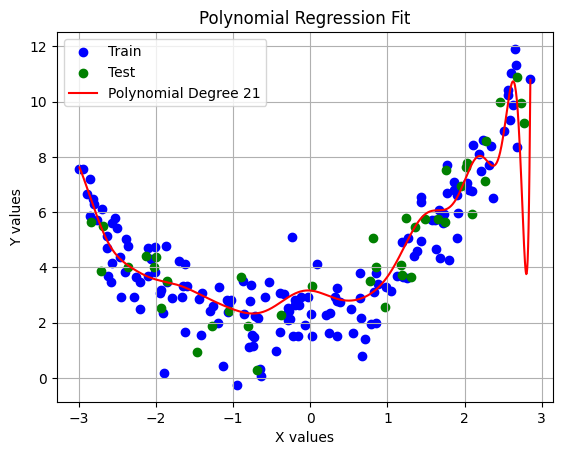

In [429]:
# Generate a range of X values for plotting
X_range = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_poly = overfit.predict(X_range_poly)

# Plot original data points
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='green', label='Test')
# Plot the polynomial curve
plt.plot(X_range, y_poly, color='red', label=f'Polynomial Degree {poly.degree}')

# Add labels, title, and grid
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.title('Polynomial Regression Fit')
plt.grid(True)

In [430]:
X_train_Poly.shape, X_range_poly.shape

((160, 21), (1000, 21))

In [431]:
overfit.coef_.shape

(21, 1)